In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black
%matplotlib inline

In [1]:
import glob
import sevir.mrms.core

cartopy not installed


In [3]:
df = sevir.mrms.core.read_many_probsevere(glob.glob("/home/coder/sevir/2021060100/ProbSevere/*"))
df.head()

ID,validTime,PS,MUCAPE,MLCAPE,MLCIN,EBSHEAR,SRH01KM,MEANWIND_1-3kmAGL,MESH,VIL_DENSITY,FLASH_RATE,FLASH_DENSITY,MAXLLAZ,P98LLAZ,P98MLAZ,MAXRC_EMISS,MAXRC_ICECF,WETBULB_0C_HGT,PWAT,CAPE_M10M30,LJA,SIZE,AVG_BEAM_HGT,MOTION_EAST,MOTION_SOUTH,coordinates
i32,datetime[μs],i32,i32,i32,i32,f32,i32,f32,f32,f32,i32,f32,f32,f32,f32,str,str,f32,f32,i32,f32,i32,str,f32,f32,list[list[list[f64]]]
68161,2021-06-01 00:00:14,14,2006,1391,-3,51.900002,42,19.200001,0.09,1.16,4,0.17,0.006,0.005,0.004,null,null,14.1,2.1,444,0.0,308,"""6.09 kft / 1.8…",5.799,-3.397,"[[[-96.44, 31.91], [-96.37, 31.91], … [-96.44, 31.91]]]"
68161,2021-06-01 00:02:40,12,1477,1007,-12,53.099998,52,17.799999,0.06,0.95,3,0.17,0.006,0.005,0.004,null,null,14.1,2.1,343,0.0,210,"""6.36 kft / 1.9…",6.135,-1.063,"[[[-96.39, 31.9], [-96.35, 31.9], … [-96.39, 31.9]]]"
68161,2021-06-01 00:04:42,9,1477,1007,-12,53.099998,52,17.799999,0.07,0.95,3,0.17,0.006,0.005,0.004,null,null,14.1,2.1,343,0.0,212,"""6.35 kft / 1.9…",6.9,-1.654,"[[[-96.39, 31.9], [-96.35, 31.9], … [-96.39, 31.9]]]"
68161,2021-06-01 00:06:38,9,1510,983,-15,53.099998,44,17.799999,0.09,0.95,3,0.17,0.006,0.005,0.002,null,null,14.1,2.1,339,0.0,159,"""6.57 kft / 2.0…",8.224,-5.895,"[[[-96.39, 31.91], [-96.36, 31.87], … [-96.39, 31.91]]]"
68161,2021-06-01 00:08:39,9,1493,1000,-13,53.099998,47,17.9,0.09,0.95,2,0.17,0.006,0.005,0.003,null,null,14.1,2.1,340,0.0,63,"""6.46 kft / 1.9…",7.612,-5.53,"[[[-96.33, 31.86], [-96.27, 31.85], … [-96.33, 31.86]]]"


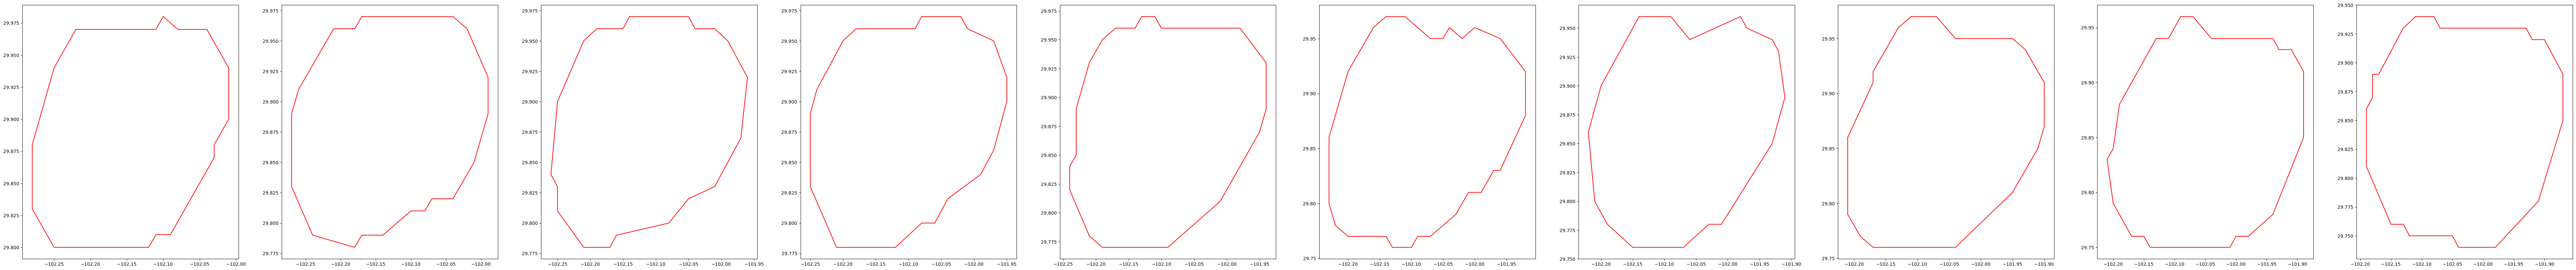

In [22]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

n = 10
_69406 = df.filter(df["ID"] == 69406).sort(pl.col("validTime"))
fig, ax = plt.subplots(1, n, figsize=(10*n, 10))
    
for i in range(n):
    arr = np.array(_69406[i, "coordinates"][0].to_list())
    x, y = arr[:, 0], arr[:, 1]
    ax[i].plot(x, y, color="red")